In [16]:
from scipy import ndimage, misc
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rnd

## Collect data

In [2]:
# Constants
FROM_FILE = "original_images.pkl" # Pickle file to collect images from 
TO_FILE = "10_ppl_1000_rot.pkl" # Name of file to store data to
IMG_SIZE0 = 97 # First dimension of image, should not be changed
IMG_SIZE1 = 90 # Second dimension of image, should not be changed

In [7]:
# Import images to DataFrame
df = pd.read_pickle(FROM_FILE) # Change to correct name of pickle file with images and data

## Random rotations

In [8]:
# Constants
N_ROTATIONS = 1000 # Number of rotations per image

In [9]:
df = df[df["Hand"]==1] # To only use one hand
df = df[df["Finger"]==0] # To only use one finger
df = df.sample(10) # To only use a few people

In [10]:
df

,Image,Identity,Gender,Hand,Finger
4115,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",508,1,1,0
1547,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",450,0,1,0
3808,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",269,0,1,0
23,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",149,1,1,0
2232,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",596,0,1,0
5149,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",588,0,1,0
626,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",316,0,1,0
4660,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",369,1,1,0
975,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",329,0,1,0
4601,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",401,0,1,0


In [11]:
def crop_center(img):
    dim0, dim1 = img.shape
    x0 = (dim0-IMG_SIZE0)//2
    x1 = (dim1-IMG_SIZE1)//2
    if dim0 < IMG_SIZE0:
        cropped_img = np.ones((IMG_SIZE0,IMG_SIZE1))*255
        dim1_crop = img[:,x1:x1+IMG_SIZE1]
        cropped_img[:dim0,:] = dim1_crop # Put image to the left. Possible source of error
    else:
        cropped_img = img[x0:x0+IMG_SIZE0,x1:x1+IMG_SIZE1]
    return cropped_img

In [17]:
def rotate_image(img):
    # Constants
    shift0 = int(rnd.gauss(0,5)) # The choice of random function should perhaps be reconsidered
    shift1 = int(rnd.gauss(0,5))
    deg = rnd.gauss(0,30) # Uncomment for gaussian distribution
    # deg = rnd.uniform(0,360) # Uncomment for uniform distribution
    # Necessary modification
    img = np.reshape(img, (IMG_SIZE0,IMG_SIZE1)) # If the input array is flattened
    # Transform the image
    new_img = ndimage.rotate(img, deg, reshape=True, cval=255) # cval gives value to fill added edges with
    new_img = ndimage.shift(new_img, [shift0, shift1], cval=255)
    new_img = crop_center(new_img)
    # plt.imshow(new_img, cmap="gray") # Uncomment to see image
    new_img = new_img.flatten() # Comment out if array should not be flattened
    return new_img

In [18]:
# Create list of rotated images and samples information
rot_images = []
for i in range(len(df)):
    data = df.iloc[i]
    img = data[0]
    for j in range(N_ROTATIONS):
        img_rot = rotate_image(img)
        rot_images.append([img_rot, data[1],data[2],data[3],data[4]])
# Store as DataFrame
new_df = pd.DataFrame(rot_images, columns=["Image","Identity","Gender","Hand","Finger"])

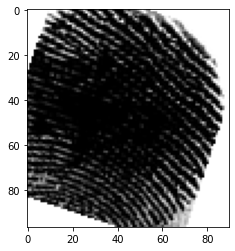

In [19]:
plt.imshow(np.reshape(list(new_df["Image"][0]), (IMG_SIZE0,IMG_SIZE1)), cmap="gray")

In [20]:
# Save data as pickle
new_df.to_pickle(TO_FILE)